# Xception con extracción de características y afinamiento

## Configuaración del entorno

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [6]:
original_dir = pathlib.Path("ExpandedDataset/")
new_base_dir = pathlib.Path("ExpandedDataset_organized/")
content = os.listdir(original_dir)
BATCH_SIZE = 64
size_x = 256
size_y = 256

In [7]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

Found 9280 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.


## Primer paso: extracción de características

In [8]:
xception_base = keras.applications.Xception(
    weights='imagenet', 
    include_top=False) 
xception_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [9]:
inputs = keras.Input(shape=(size_x , size_y, 3))
xception_base.trainable = False

x = keras.applications.xception.preprocess_input(inputs) 
x = xception_base(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(58, activation="softmax")(x)

model6 = keras.Model(inputs, outputs)

model6.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 256, 256, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 256, 256, 3)       0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 2048)        0         
_________________________________________________________________
dense (Dense)                (None, 4, 4, 256)         524544    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0     

In [15]:
inputs = keras.Input(shape=(size_x , size_y, 3))
xception_base.trainable = False

x = keras.applications.xception.preprocess_input(inputs) 
x = xception_base(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(58, activation="softmax")(x)

model6 = keras.Model(inputs, outputs)

model6.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf.math.truediv_5 (TFOpLambd (None, 256, 256, 3)       0         
_________________________________________________________________
tf.math.subtract_5 (TFOpLamb (None, 256, 256, 3)       0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 2048)        0         
_________________________________________________________________
dense_8 (Dense)              (None, 4, 4, 256)         524544    
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0   

In [16]:
model6.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])
    
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model6/best_version",
    save_best_only=True,
    monitor="val_loss")
    ]

history = model6.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
145/145 [==============================] - 44s 279ms/step - loss: 1.4917 - accuracy: 0.5728 - val_loss: 0.7067 - val_accuracy: 0.7733
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
145/145 [==============================] - 38s 256ms/step - loss: 0.5458 - accuracy: 0.8169 - val_loss: 0.5378 - val_accuracy: 0.8276
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/15
145/145 [==============================] - 38s 256ms/step - loss: 0.3403 - accuracy: 0.8898 - val_loss: 0.5787 - val_accuracy: 0.8250
Epoch 4/15
145/145 [==============================] - 39s 264ms/step - loss: 0.2519 - accuracy: 0.9163 - val_loss: 0.5095 - val_accuracy: 0.8578
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/15
145/145 [==============================] - 38s 255ms/step - loss: 0.2062 - accuracy: 0.9329 - val_loss: 0.5164 - val_accuracy: 0.8621
Epoch 6/15
145/145 [==============================] - 38s 257ms/step - loss: 0.1588 - accuracy: 0.9460 - val_loss: 0.5987 - val_accuracy: 0.8647
Epoch 7/15
145/145 [==============================] - 39s 259ms/step - loss: 0.1414 - accuracy: 0.9554 - val_loss: 0.5794 - val_accuracy: 0.8707
Epoch 8/15
145/145 [==============================] - 39s 265ms/step - loss: 0.1243 - accuracy: 0.9620 - val_loss: 0.6531 - val_accuracy: 0.8724
Epoch 9/15
145/145 [==============================] - 40s 267ms/step - loss: 0.1093 - accuracy: 0.9665 - val_loss: 0.5895 - val_accuracy: 0.8690
Epoch 10/15
145/145 [==============================] - 40s 267ms/step - loss: 0.1023 - accuracy: 0.9721 - val_loss: 0.5744 - val_accuracy: 0.8828
Epoch 11/15
145/145 [==============================] - 40s 269ms/step - loss: 0.1077 - accuracy: 0.9696 - val_loss: 0.7041 - val_

In [17]:
model6.save('model6/model')
np.save('model6/history.npy',history.history)

INFO:tensorflow:Assets written to: model6/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


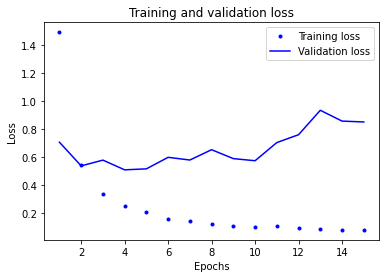

In [18]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "b.", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

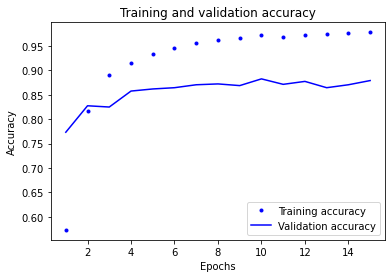

In [19]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, "b.", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
results= model6.evaluate(test_dataset)
results

19/19 [==============================] - 5s 211ms/step - loss: 0.8976 - accuracy: 0.8819


[0.8976331949234009, 0.8818965554237366]

In [21]:
model = keras.models.load_model('model6/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 213ms/step - loss: 0.4076 - accuracy: 0.8716


[0.4075509309768677, 0.8715517520904541]

## Segundo paso: ajuste y afinamiento

In [33]:
model = keras.models.load_model('model6/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 213ms/step - loss: 0.4076 - accuracy: 0.8716


[0.4075520932674408, 0.8715517520904541]

In [34]:
model = keras.models.load_model('model6/best_version')

In [35]:
for layer in model.layers:
    print(layer.name)

input_12
tf.math.truediv_5
tf.math.subtract_5
xception
max_pooling2d_4
dense_8
flatten_5
dropout_4
dense_9


In [36]:
xception = model.get_layer('xception')
for layer in xception.layers:
    print(layer.name)

input_11
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d_20
block2_pool
batch_normalization_20
add_60
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_21
block3_pool
batch_normalization_21
add_61
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_22
block4_pool
batch_normalization_22
add_62
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_63
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_64
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv

In [37]:
def freeze_layers(model, trainable):
    for layer in model.layers[:(len(model.layers) - trainable)]:
        layer.trainable = False

    for layer in model.layers[(len(model.layers) - trainable):]:
        if layer.name != "batch_normalization_67":
            layer.trainable = True
            print(layer.name)


## Primer afinamiento

In [38]:
freeze_layers(xception, 16)    
freeze_layers(model, 4)  
    
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=7e-4, momentum=0.95),
    metrics=['accuracy']
)

block13_sepconv1_act
block13_sepconv1
block13_sepconv1_bn
block13_sepconv2_act
block13_sepconv2
block13_sepconv2_bn
conv2d_23
block13_pool
batch_normalization_23
add_71
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act
dense_8
flatten_5
dropout_4
dense_9


In [39]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model6/model_checkpoint",
    save_best_only=True,
    monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks = callbacks
)

Epoch 1/10
145/145 [==============================] - 42s 265ms/step - loss: 0.0961 - accuracy: 0.9673 - val_loss: 0.3658 - val_accuracy: 0.8905
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
145/145 [==============================] - 39s 262ms/step - loss: 0.0640 - accuracy: 0.9793 - val_loss: 0.3520 - val_accuracy: 0.8931
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/10
145/145 [==============================] - 40s 265ms/step - loss: 0.0555 - accuracy: 0.9821 - val_loss: 0.3413 - val_accuracy: 0.8966
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/10
145/145 [==============================] - 44s 292ms/step - loss: 0.0471 - accuracy: 0.9845 - val_loss: 0.3409 - val_accuracy: 0.8966
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/10
145/145 [==============================] - 40s 265ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.3378 - val_accuracy: 0.9017
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/10
145/145 [==============================] - 41s 277ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.3327 - val_accuracy: 0.9017
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 7/10
145/145 [==============================] - 40s 268ms/step - loss: 0.0329 - accuracy: 0.9912 - val_loss: 0.3371 - val_accuracy: 0.8983
Epoch 8/10
145/145 [==============================] - 40s 268ms/step - loss: 0.0326 - accuracy: 0.9907 - val_loss: 0.3350 - val_accuracy: 0.9026
Epoch 9/10
145/145 [==============================] - 40s 266ms/step - loss: 0.0308 - accuracy: 0.9926 - val_loss: 0.3381 - val_accuracy: 0.9009
Epoch 10/10
145/145 [==============================] - 40s 271ms/step - loss: 0.0272 - accuracy: 0.9934 - val_loss: 0.3340 - val_accuracy: 0.9026


In [40]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 5s 216ms/step - loss: 0.2817 - accuracy: 0.9129


[0.281676709651947, 0.9129310250282288]

In [41]:
model.save('model6/best_version')

INFO:tensorflow:Assets written to: model6/best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Segundo afinamiento

In [42]:
model = keras.models.load_model('model6/best_version')

In [44]:
freeze_layers(xception, 8)    
freeze_layers(model, 4)  
    
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
    metrics=['accuracy'])

batch_normalization_23
add_71
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act
dense_8
flatten_5
dropout_4
dense_9


In [45]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model6/model_checkpoint",
    save_best_only=True,
    monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks = callbacks
)

Epoch 1/10
145/145 [==============================] - 43s 272ms/step - loss: 0.0258 - accuracy: 0.9940 - val_loss: 0.3335 - val_accuracy: 0.9009
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
145/145 [==============================] - 41s 271ms/step - loss: 0.0269 - accuracy: 0.9930 - val_loss: 0.3327 - val_accuracy: 0.9009
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/10
145/145 [==============================] - 40s 263ms/step - loss: 0.0243 - accuracy: 0.9942 - val_loss: 0.3324 - val_accuracy: 0.9000
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/10
145/145 [==============================] - 39s 262ms/step - loss: 0.0273 - accuracy: 0.9929 - val_loss: 0.3328 - val_accuracy: 0.9017
Epoch 5/10
145/145 [==============================] - 40s 272ms/step - loss: 0.0256 - accuracy: 0.9934 - val_loss: 0.3330 - val_accuracy: 0.9017
Epoch 6/10
145/145 [==============================] - 39s 265ms/step - loss: 0.0254 - accuracy: 0.9930 - val_loss: 0.3331 - val_accuracy: 0.9034
Epoch 7/10
145/145 [==============================] - 41s 274ms/step - loss: 0.0255 - accuracy: 0.9939 - val_loss: 0.3328 - val_accuracy: 0.9017
Epoch 8/10
145/145 [==============================] - 40s 268ms/step - loss: 0.0235 - accuracy: 0.9940 - val_loss: 0.3334 - val_accuracy: 0.9017
Epoch 9/10
145/145 [==============================] - 40s 269ms/step - loss: 0.0253 - accuracy: 0.9931 - val_loss: 0.3327 - val_accuracy: 0.9009
Epoch 10/10
145/145 [==============================] - 40s 265ms/step - loss: 0.0237 - accuracy: 0.9953 - val_loss: 0.3329 - val_a

In [46]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 5s 230ms/step - loss: 0.2804 - accuracy: 0.9147


[0.28043729066848755, 0.9146551489830017]

In [47]:
model = keras.models.load_model('model6/model_checkpoint')

In [48]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 216ms/step - loss: 0.2819 - accuracy: 0.9147


[0.2818533182144165, 0.9146551489830017]